In [4]:
import pandas as pd

columns = [
    'sepal length in cm',
    'sepal width in cm',
    'petal length in cm',
    'petal width in cm',
    'class type',
];

df = pd.read_csv('assets/iris.data', names=columns, index_col='class type')

print(df.head(6))

             sepal length in cm  sepal width in cm  petal length in cm  \
class type                                                               
Iris-setosa                 5.1                3.5                 1.4   
Iris-setosa                 4.9                3.0                 1.4   
Iris-setosa                 4.7                3.2                 1.3   
Iris-setosa                 4.6                3.1                 1.5   
Iris-setosa                 5.0                3.6                 1.4   
Iris-setosa                 5.4                3.9                 1.7   

             petal width in cm  
class type                      
Iris-setosa                0.2  
Iris-setosa                0.2  
Iris-setosa                0.2  
Iris-setosa                0.2  
Iris-setosa                0.2  
Iris-setosa                0.4  


In [5]:
df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(df, df.index, random_state=1, stratify=df.index, train_size=0.75)

print("Total data:", df.shape[0])
print("Total training data:", xTrain.shape[0])
print("Total test data:", xTest.shape[0])

Total data: 150
Total training data: 120
Total test data: 30


In [19]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(xTrain, yTrain)

# test with predictions

predictions = naive_bayes.predict(xTest)
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype='<U15')

In [20]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(yTest, predictions))

Accuracy: 1.0


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(yTest, predictions)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[12  0  0]
 [ 0 12  1]
 [ 0  0 13]]


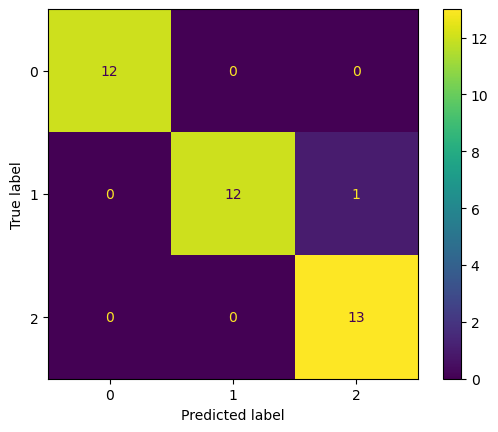

In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()